## 1) Global Mean Sea Level (GMSL)



**Dataset Title:** MEaSUREs Global Mean Sea Level (GMSL) from TOPEX/Poseidon, Jason-1, Jason-2, and Jason-3, Version 2

**Description:**
This dataset provides global mean sea level trends derived from the TOPEX/Poseidon, Jason-1, Jason-2, and Jason-3 satellite missions. The data spans from 1992 to present, offering monthly measurements of sea level anomalies. It includes corrections for instrumental and environmental effects, ensuring high accuracy for climate research.

**Key Features:**
- Time Span: 1992 to present
- Temporal Resolution: Monthly
- Variables: Sea level anomalies, uncertainties, corrections

**Access and Documentation:**
- [Dataset Access](https://podaac.jpl.nasa.gov/dataset/MERGED_TP_J1_OSTM_OST_GMSL_ASCII_V51)
- [User Guide and Documentation](https://podaac.jpl.nasa.gov/dataset/MERGED_TP_J1_OSTM_OST_GMSL_ASCII_V51)

This dataset is essential for studying long-term sea level changes and their impact on coastal regions.

___
#### Source
	Beckley, B.; Yang, X.; Zelensky, N.P.; Holmes, S.A.;Lemoine, F.G.; Ray, R.D.; Mitchum, G.T.; Desai, S.; Brown, S.T.. 2021. Global Mean Sea Level Trend from Integrated Multi-Mission Ocean Altimeters TOPEX/Poseidon, Jason-1, OSTM/Jason-2, and Jason-3 Version 5.1. Ver. 5.1. PO.DAAC, CA, USA. Dataset accessed [YYYY-MM-DD] at https://doi.org/10.5067/GMSLM-TJ151

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os, json
import missingno as msno
import datetime as dt

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:

df = pd.read_csv('../data/GMSL/GMSL_TPJAOS_5-1_FULL.csv', parse_dates=['date'],
                      index_col='date')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1146 entries, 1993-01-05 04:58:03.936000 to 2024-02-15 09:54:06.048003
Data columns (total 14 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   altimeter type                                                         1146 non-null   int64  
 1   file cycle #                                                           1146 non-null   int64  
 2   year+fraction of year                                                  1146 non-null   float64
 3   # of obs                                                               1146 non-null   int64  
 4   # of weighted obs                                                      1146 non-null   float64
 5   GSML Variation(mm)                                                     1146 non-null   float64
 6   std dev of GSML Variation(mm)         

,altimeter type,file cycle #,year+fraction of year,# of obs,# of weighted obs,GSML Variation(mm),std dev of GSML Variation(mm),smoothed GSLM Variation(mm),GSML Variation(mm) (GIA applied),std dev of GSML Variation(mm) (GIA applied),smoothed GSLM Variation(mm) (GIA applied),smoothed GSLM Variation(mm) (GIA applied; annual signals removed),smoothed GSLM Variation(mm) (GIA not applied; annual signals removed),year
date,,,,,,,,,,,,,,
1993-01-05 04:58:03.936000,0,11,1993.011526,466881,338409.69,-37.91,89.01,-37.67,-37.90,89.01,-37.66,-37.64,-37.66,1993
1993-01-15 02:56:30.912003,0,12,1993.038692,459563,333609.59,-40.95,89.95,-39.07,-40.94,89.95,-39.06,-38.53,-38.55,1993
1993-01-25 00:54:57.887998,0,13,1993.065858,402996,292736.50,-41.09,86.90,-39.11,-41.07,86.90,-39.09,-38.16,-38.19,1993
1993-02-03 22:53:56.399997,0,14,1993.093025,462894,336670.31,-43.38,88.73,-39.40,-43.36,88.73,-39.38,-38.12,-38.16,1993
1993-02-13 20:52:23.375999,0,15,1993.120191,460498,332486.09,-38.66,89.87,-38.51,-38.63,89.87,-38.48,-36.96,-37.00,1993


0


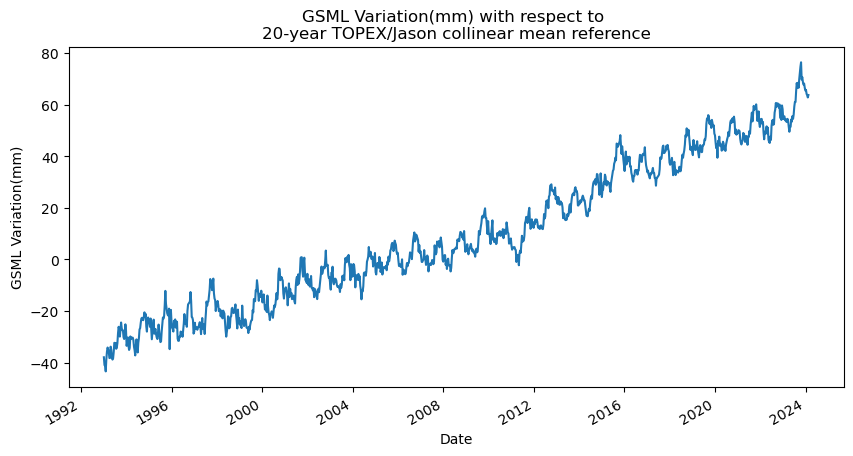

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
df['GSML Variation(mm)'].plot(ax=ax, title='GSML Variation(mm) with respect to \n20-year TOPEX/Jason collinear mean reference')
ax.set(ylabel='GSML Variation(mm)', xlabel='Date');
print(df['GSML Variation(mm)'].isna().sum())

In [4]:
ts = df['GSML Variation(mm)']
ts

date
1993-01-05 04:58:03.936000   -37.91
1993-01-15 02:56:30.912003   -40.95
1993-01-25 00:54:57.887998   -41.09
1993-02-03 22:53:56.399997   -43.38
1993-02-13 20:52:23.375999   -38.66
                              ...  
2024-01-06 20:35:52.799998    65.73
2024-01-16 17:55:26.112000    64.19
2024-01-26 15:14:59.424001    63.64
2024-02-05 12:34:32.736002    62.79
2024-02-15 09:54:06.048003    63.72
Name: GSML Variation(mm), Length: 1146, dtype: float64

0


<Axes: xlabel='date'>

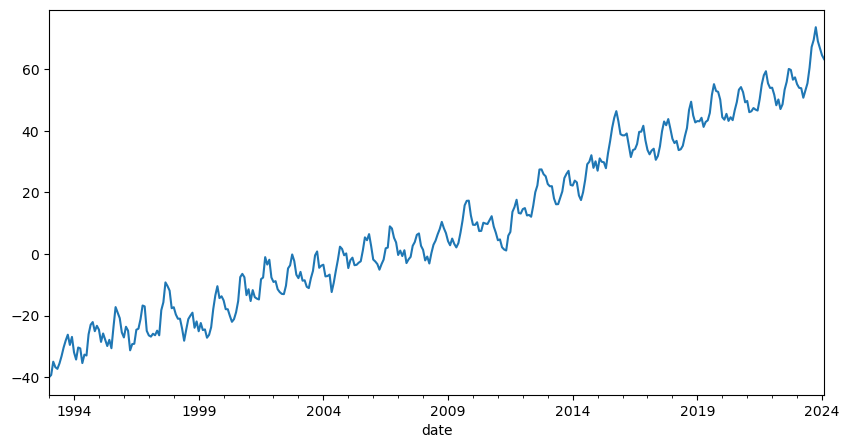

In [5]:
ts_me = ts.resample("ME").mean()
print(ts_me.isna().sum())
ts_me.plot()
#

In [6]:
# !pip uninstall -y pmdarima
%conda config --add channels conda-forge
%conda config --set channel_priority strict
%conda install -y pmdarima


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer, FourierFeaturizer
# from pmdarima.arima import StepwiseContext
# from pmdarima.preprocessing import 
# help(pm.preprocessing)

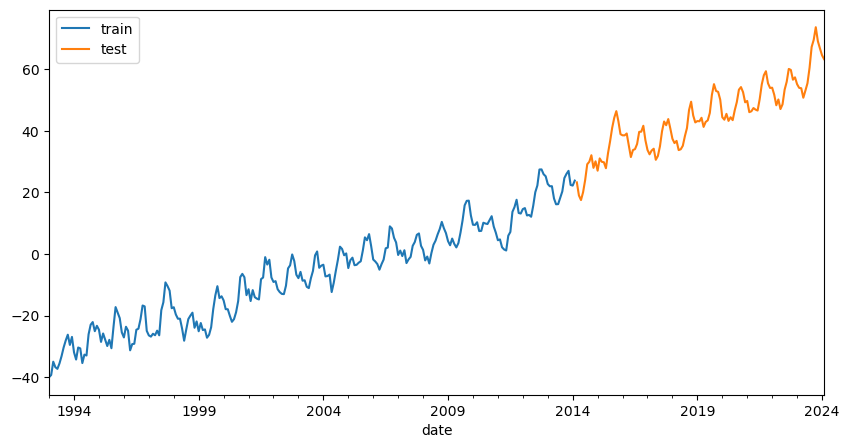

In [8]:
train, test = train_test_split(ts_me, test_size=12*10)

fig, ax = plt.subplots(figsize=(10,5))
train.plot(ax=ax, label='train')
test.plot(ax=ax, label='test')
ax.legend();


In [9]:
# pm.auto_arima

In [10]:
# pipe = Pipeline(steps=[('fourier', FourierFeaturizer(12)),
#                  ('boxcox', BoxCoxEndogTransformer()),
#                  ('arima', pm.arima.AutoARIMA())])
# pipe

In [11]:
first_date = ts_me.first_valid_index()

first_value = ts_me.loc[first_date]
print(f"{first_date=}, {first_value=}")

first_date=Timestamp('1993-01-31 00:00:00'), first_value=-39.983333333333334


<Axes: xlabel='date'>

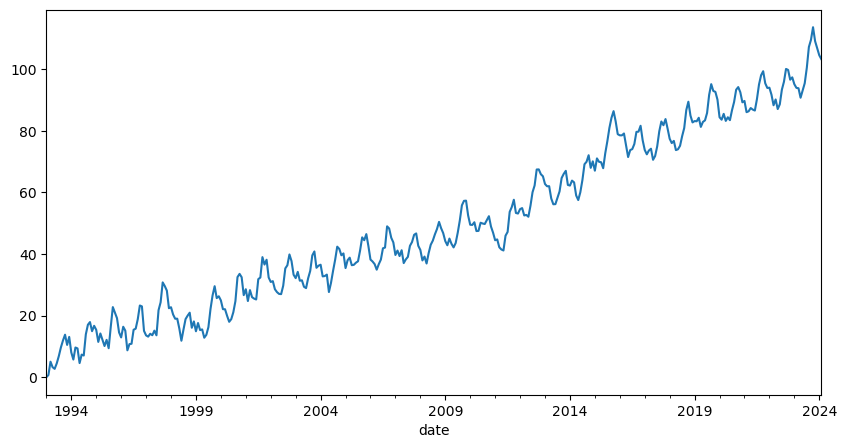

In [12]:

ts_pos = ts_me - first_value
ts_pos.plot()

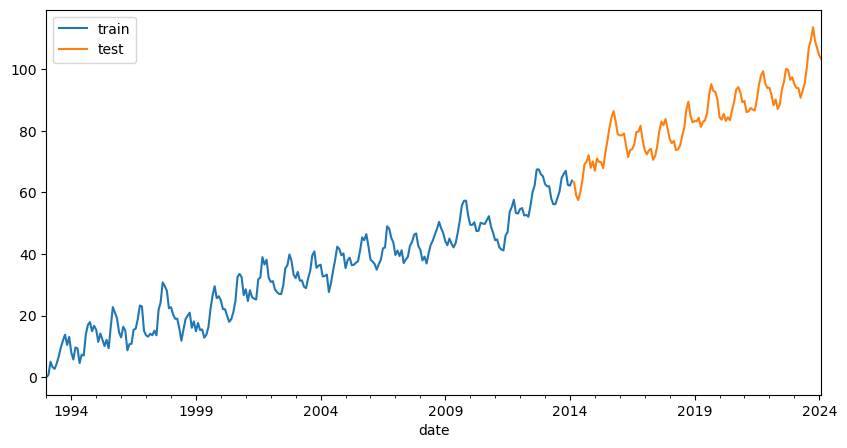

In [13]:
train, test = train_test_split(ts_pos, test_size=12*10)
fig, ax = plt.subplots(figsize=(10,5))
train.plot(ax=ax, label='train')
test.plot(ax=ax, label='test')
ax.legend();

In [14]:
# Initialize BoxCox transformer
boxcox_transformer = BoxCoxEndogTransformer(lmbda2=1e-6)

# Fit and transform the data
ts_transformed, _ = boxcox_transformer.fit_transform(ts_pos)
ts_transformed.shape

(374,)

In [15]:

# Initialize Fourier Featurizer
fourier_featurizer = FourierFeaturizer(m=12, k=4)

# Fit the featurizer on the data
fft_index, fft_terms = fourier_featurizer.fit_transform(train.index)
display(fft_terms, fft_index)

,FOURIER_S12-0,FOURIER_C12-0,FOURIER_S12-1,FOURIER_C12-1,FOURIER_S12-2,FOURIER_C12-2,FOURIER_S12-3,FOURIER_C12-3
0,0.500000,8.660254e-01,8.660254e-01,0.500000,1.000000e+00,-4.371139e-08,8.660254e-01,-0.500000
1,0.866025,5.000000e-01,8.660254e-01,-0.500000,-8.742278e-08,-1.000000e+00,-8.660255e-01,-0.500000
2,1.000000,-4.371139e-08,-8.742278e-08,-1.000000,-1.000000e+00,1.311342e-07,1.748456e-07,1.000000
3,0.866025,-5.000001e-01,-8.660255e-01,-0.500000,1.748456e-07,1.000000e+00,8.660253e-01,-0.500000
4,0.500000,-8.660254e-01,-8.660253e-01,0.500000,1.000000e+00,-2.185570e-07,-8.660255e-01,-0.500000
...,...,...,...,...,...,...,...,...
249,-0.866024,5.000032e-01,-8.660290e-01,-0.499994,-1.092785e-05,-1.000000e+00,8.660181e-01,-0.500013
250,-0.499997,8.660272e-01,-8.660217e-01,0.500006,-1.000000e+00,1.097156e-05,-8.660327e-01,-0.499987
251,0.000004,1.000000e+00,7.343514e-06,1.000000,1.101527e-05,1.000000e+00,1.468703e-05,1.000000
252,0.500003,8.660236e-01,8.660291e-01,0.499994,1.000000e+00,-1.105898e-05,8.660180e-01,-0.500013


DatetimeIndex(['1993-01-31', '1993-02-28', '1993-03-31', '1993-04-30',
               '1993-05-31', '1993-06-30', '1993-07-31', '1993-08-31',
               '1993-09-30', '1993-10-31',
               ...
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28'],
              dtype='datetime64[ns]', name='date', length=254, freq='ME')

In [16]:
# Create a pipeline with BoxCox and Fourier featurizer
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('fourier', FourierFeaturizer(m=12, k=5)),
    ('arima',pm.AutoARIMA(seasonal=False, stepwise=True, trace=True))
])

# Fit the pipeline on the data
pipeline.fit(train)#, exogenous=fourier_terms)
pipeline.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=625.714, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=654.065, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=623.870, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=619.779, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=655.669, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=621.714, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=621.710, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=622.015, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=627.211, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.066 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  254
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -296.889
Date:                Fri, 28 Jun 2024   AIC                            619.779
Time:                        15:53:02   BIC                            665.713
Sample:                             0   HQIC                           638.260
                                - 254                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0956      0.032      2.992      0.003       0.033       0.158
FOURIER_S12-0    -1.2394      0.094    -13.134      0.000      -1.424      -1.054
FOURIER_C12-0     0.9303      0.103      9.045      0.000       0.729       1.132
FOURIER_S12-1    -0.1986      0.067     -2.978      0.003      -0.329      -0.068
FOURIER_C12-1    -0.5461      0.064     -8.598      0.000      -0.671      -0.422
FOURIER_S12-2    -0.0774      0.055     -1.401      0.161      -0.186       0.031
FOURIER_C12-2    -0.0340      0.057     -0.600      0.548      -0.145       0.077
FOURIER_S12-3     0.0594      0.054      1.097      0.273      -0.047       0.166
FOURIER_C12-3     0.0909      0.051      1.783      0.075      -0.009       0.191
FOURIER_S12-4     0.0068      0.055      0.123      0.902      -0.101       0.115
FOURIER_C12-4     0.0125      0.051      0.244      0.807      -0.088       0.113
ma.L1            -0.3947      0.061     -6.441      0.000      -0.515      -0.275
sigma2            0.6116      0.049     12.471      0.000       0.516       0.708
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                27.35
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# Get forecast for the test set
n_periods = len(test)
n_periods

120

In [18]:
# Use .predict on pipeline and return conf indeterval
forecast, conf_int = pipeline.predict(n_periods=n_periods, return_conf_int=True)#, exogenous=fourier_featurizer.transform(test.index))
forecast_df = pd.DataFrame({'forecast': forecast, 'lower': conf_int[:, 0], 'upper': conf_int[:, 1]}, index=test.index)
forecast_df

,forecast,lower,upper
date,,,
2014-03-31,63.187426,57.637903,68.894323
2014-04-30,61.287441,54.880280,67.912128
2014-05-31,59.631191,52.496087,67.045018
2014-06-30,61.145045,53.242753,69.381889
2014-07-31,64.515671,55.814532,73.602000
...,...,...,...
2023-10-31,118.580379,76.360735,166.194662
2023-11-30,115.685689,73.678363,163.184964
2023-12-31,112.408465,70.676696,159.739456


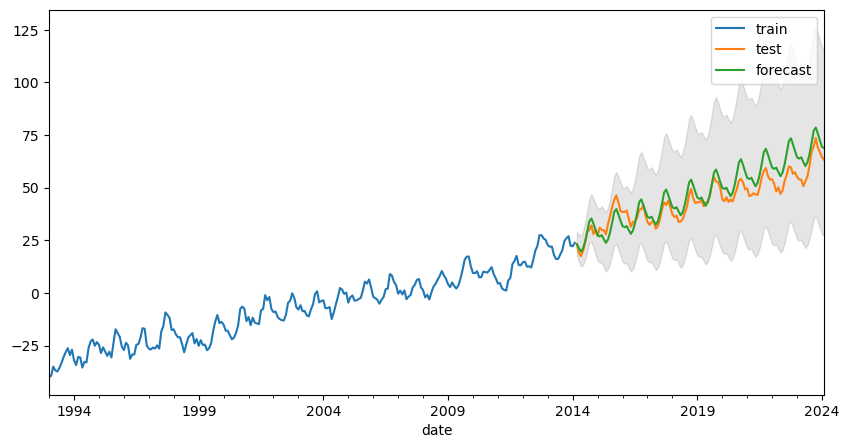

In [19]:

# Add the first value back to the forecast to get the original scale
train_final = train + first_value 
test_final = test + first_value
forecast_final = forecast_df + first_value

# Plot the forecast
fig, ax = plt.subplots(figsize=(10,5))
train_final.plot(ax=ax, label='train')
test_final.plot(ax=ax, label='test')
forecast_final['forecast'].plot(ax=ax, label='forecast')
ax.fill_between(forecast_final.index, forecast_final['lower'], forecast_final['upper'], color='k', alpha=0.1)
ax.legend();


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

def evaluate_forecast(y_true, y_pred, print_output=True):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    results=   {'mse': mse, 'mae': mae, 'mape(%)': mape * 100}
    if print_output:
        for metric, value in results.items():
            print(f"{metric.upper()}: {value:.2f}")
        
    
    return results

In [21]:
evaluate_forecast(test, forecast_df['forecast']);

MSE: 35.73
MAE: 5.12
MAPE(%): 5.90
